# Installation via pip install deskew

https://github.com/sbrunner/deskew

In [1]:
import numpy as np
from skimage import io
from skimage.transform import rotate
from skimage.color import rgb2gray
from deskew import determine_skew
from matplotlib import pyplot as plt

In [2]:
def deskew(_img):
    image = io.imread(_img)
    grayscale = rgb2gray(image)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, resize=True) * 255
    return rotated.astype(np.uint8)

In [3]:
def display_avant_apres(_original):
    plt.subplot(1, 2, 1)
    plt.imshow(io.imread(_original))
    plt.subplot(1, 2, 2)
    plt.imshow(deskew(_original))

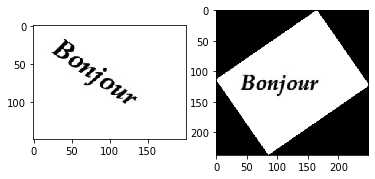

In [4]:
display_avant_apres('img_35h.jpg')

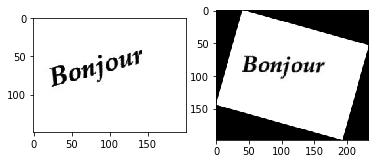

In [5]:
display_avant_apres('img_15ah.jpg')

In [21]:
io.imsave('output.png', deskew('img_15ah.jpg'))

## Vérifions avec Tesseract

In [39]:
import pytesseract
from pytesseract import Output

In [40]:
image1 = Image.open('img_35h.jpg')
pytesseract.image_to_string(image1, lang='fra')

''

In [41]:
image1 = Image.open('output.png')
pytesseract.image_to_string(image1, lang='fra')

'Bonjour A\n__ —R'

### On ne récupère que les données textuelle

In [42]:
import cv2

def displaycv(_img):
    cv2.destroyAllWindows()
    cv2.imshow("Label", _img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

textes = []
img = cv2.imread('output.png')
text_pattern = "[a-zA-Z0-9]"
d = pytesseract.image_to_data(image1, output_type=Output.DICT)
for i in range(len(d['text'])):
    if int(d['conf'][i]) > 60:
        if re.match(text_pattern, d['text'][i]):
            (x, y, w, z) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + z), (0, 255, 0), 2)
            textes.append(d['text'][i])

displaycv(img)

In [31]:
d

{'level': [1, 2, 3, 4, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1],
 'left': [0, 0, 0, 40, 40, 193, 0, 0],
 'top': [0, 55, 55, 55, 66, 55, 145, 145],
 'width': [233, 226, 233, 186, 122, 33, 190, 190],
 'height': [198, 143, 143, 143, 43, 143, 53, 53],
 'conf': ['-1', '-1', '-1', '-1', 96, 95, '-1', 37],
 'text': ['', '', '', '', 'Bonjour', '|', '', '_']}

In [38]:
textes

['Bonjour']